In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams

# 设置字体（SimHei 是常用的中文字体）
rcParams['font.sans-serif'] = ['SimHei']  # 用于正常显示中文标签
rcParams['axes.unicode_minus'] = False   # 用于正常显示负号

In [60]:
data = pd.read_csv('advertising.csv')
df = pd.DataFrame(data)
df.describe()


,wechat,weibo,others,sales
count,200.000000,200.000000,200.000000,200.000000
mean,669.046500,186.112000,244.432000,15.130500
std,390.638071,118.774473,174.228967,5.283892
min,3.200000,0.000000,2.400000,1.600000
25%,338.425000,79.800000,102.000000,11.000000
50%,681.350000,183.200000,206.000000,16.000000
75%,995.675000,292.200000,360.800000,19.050000
max,1348.600000,396.800000,912.000000,27.000000


回归系数： [1.51305000e+01 4.66268982e+00 1.58468612e+00 7.29559635e-03]
均方误差： 6819.7308837880555


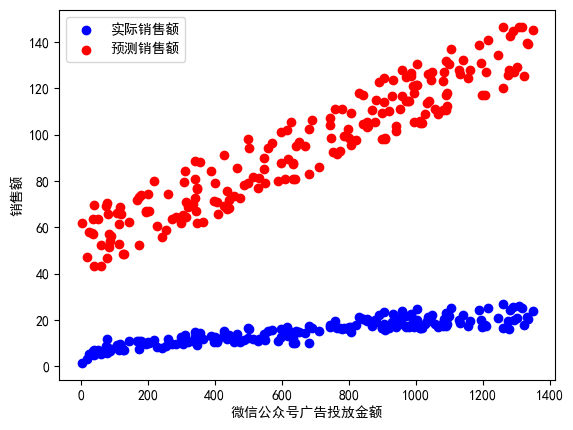

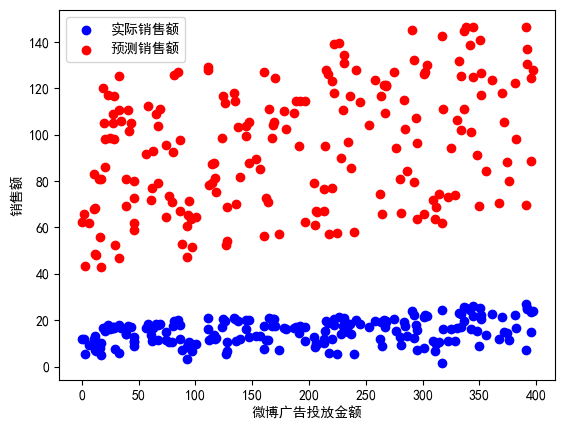

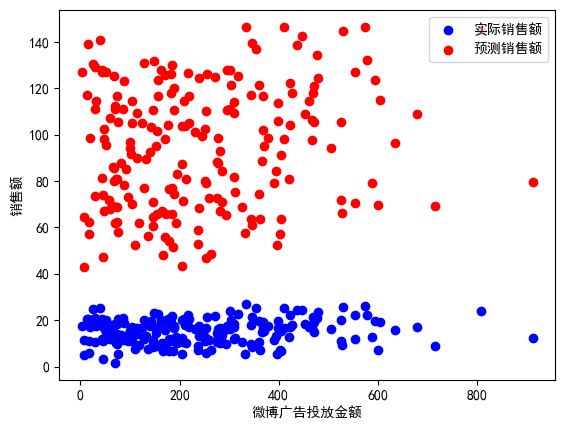

In [61]:

def z_score_normalization(data):
    mu = np.mean(data, axis=0)  
    sigma = np.std(data, axis=0)  
    return (data - mu) / sigma  

X = np.array(data[['wechat', 'weibo', 'others']])  
y = data['sales'].values  
X_norm = z_score_normalization(X)  
y_norm = z_score_normalization(y.reshape(-1, 1))  

X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]  

# 使用最小二乘法计算回归系数
beta = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y)
print("回归系数：", beta)

# 用模型预测
y_pred = X_norm.dot(beta)
y_pred = y_pred * np.std(y) + np.mean(y)
# 计算均方误差（MSE）
mse = np.mean((y - y_pred)**2)
print("均方误差：", mse)

# 微信可视化
plt.scatter(df['wechat'], y, color='blue', label='实际销售额')
plt.scatter(df['wechat'], y_pred, color='red', label='预测销售额')
plt.xlabel('微信公众号广告投放金额')
plt.ylabel('销售额')
plt.legend()
plt.show()
#微博可视化
plt.scatter(df['weibo'], y, color='blue', label='实际销售额')
plt.scatter(df['weibo'], y_pred, color='red', label='预测销售额')
plt.xlabel('微博广告投放金额')
plt.ylabel('销售额')
plt.legend()
plt.show()

plt.scatter(df['others'], y, color='blue', label='实际销售额')
plt.scatter(df['others'], y_pred, color='red', label='预测销售额')
plt.xlabel('微博广告投放金额')
plt.ylabel('销售额')
plt.legend()
plt.show()

